# Assignment 3 
## --Dongyu Zhang 3035543817

# Question 1

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## 1. Data preperations

In [2]:
hitters = pd.read_csv('Hitters.csv',index_col=0)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


In [3]:
hitters['League'] = hitters['League'].apply(lambda x: 0 if x == 'N' else 1)
hitters['Division'] = hitters['Division'].apply(lambda x: 0 if x == 'W' else 1)
hitters['NewLeague'] = hitters['NewLeague'].apply(lambda x: 0 if x == 'N' else 1)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,6.163315,0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,6.173786,1
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,6.214608,0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,4.516339,0
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,6.620073,1


## 2. Creating training and testing dataset 

In [4]:
h_train = hitters[0:200]
h_target = h_train['Salary']
h_test = hitters[200:]

In [5]:
train_x = h_train.drop(["Salary"], axis=1)
train_y = h_target
test_x = h_test.drop(["Salary"], axis=1)

## 3. Using GridSearchCV to find the ultimate parameters

In [6]:
params = {
    'objective':['reg:linear'],   # Objective of 
    'gamma': [0,2,4,6],                    # Minimum loss reduction, the larger the more conservative
    'max_depth':[2,4,6,8,10],                   # Larger the depth, higher the chance of overfitted
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.3],                       # Learning rate
    'n_estimators': [70,75,80,85,90,95,100]
}

In [7]:
xgb_model = xgb.XGBRegressor()
grid = GridSearchCV(xgb_model, params,scoring='neg_mean_squared_error',n_jobs = 6,verbose=1)
grid.fit(train_x, train_y)

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


[Parallel(n_jobs=6)]: Done 324 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 2100 out of 2100 | elapsed:   13.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'objective': ['reg:linear'], 'gamma': [0, 2, 4, 6], 'max_depth': [2, 4, 6, 8, 10], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.3], 'n_estimators': [70, 75, 80, 85, 90, 95, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

## 3. Printing Testing error

In [9]:
pred = grid.best_estimator_.predict(test_x)
print(np.sqrt(metrics.mean_squared_error(h_test['Salary'], pred)))

0.4688511529759803


## 4. Ploting the variable importance

In [10]:
para_list = params.keys()
best_paras = grid.best_estimator_.get_params()
paras = {}
for para in best_paras:
    if para in para_list:
        paras[para] = best_paras[para]

In [11]:
best_para = grid.best_estimator_.get_params()
dtrain = xgb.DMatrix(train_x, train_y)
model = xgb.train(paras, dtrain)

[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:44:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

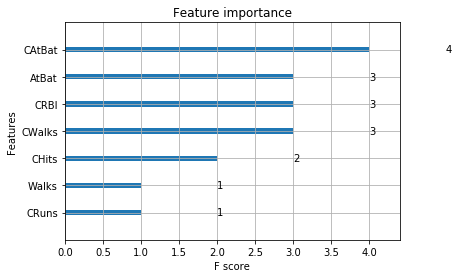

In [13]:
xgb.plot_importance(model)

<br><br><br>

# Question 2

### Importing packages and data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

/Users/DONGYU/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


### Initiating parameters

In [3]:
img_size_flat = data.img_size_flat
img_shape = data.img_shape
num_classes = data.num_classes

x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)

cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Defining session class and functions

In [4]:
class tfSession():
    # Session class for creating a new session
    def __init__(self):
        self.session = tf.Session(config=config)
    def __enter__(self):
        self.session.run(tf.global_variables_initializer())
        return self.session
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.session.close()

In [5]:
def optimize(batch_size=100):
    """
    Optimize function for running optimize function only one time
    batch_size: batch size for random batch, default 100
    return: current model training error
    """
    x_batch, y_true_batch, y_true_cls_batch = data.random_batch(batch_size=batch_size)
    feed_dict_train = {x: x_batch, y_true: y_true_batch}
    session.run(optimizer, feed_dict=feed_dict_train)
    
    feed_dict_train = {x: x_batch, y_true: y_true_batch, y_true_cls: y_true_cls_batch}
    acc = session.run(accuracy, feed_dict=feed_dict_train)
        
    return 1-acc

In [6]:
feed_dict_test = {x: data.x_test, y_true: data.y_test, y_true_cls: data.y_test_cls}

def return_accuracy():
    # Return current model testing error
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    return 1-acc

## 1. Plot the test error and training error as a function of number of iterations.

### Define function for current question

In [7]:
def run_ts(num_iterations,batch_size=100):
    """
    Run tensorflowfor for certain times
    num_iterations: times of iterations
    batch_size: batch size for random batch
    return: error dictionary containing Training and Testing Error
    """
    train_acc = []
    test_acc = []
    for i in range(num_iterations):
        # Training the model and get training error
        train_acc.append(optimize(batch_size))

        # Get Current Testing Error
        test_acc.append(return_accuracy())
    return {'Training': train_acc, 'Testing': test_acc}

In [8]:
def plotTTError(errorDict, title):
    """
    Plot Training and Testing Error in one graph
    errorDict: error ditionary get from run_ts()
    title: title for error graph
    """
    x_axis = list(range(0,400))
    plt.title(title)
    plt.plot(x_axis, errorDict['Training'], color='blue', alpha=0.6, label='Training Error')
    plt.plot(x_axis, errorDict['Testing'],  color='red', alpha=0.6, label='Testing Error')
    plt.legend()
    plt.xlabel('Number of iterations')
    plt.ylabel('Error')
    plt.show()

### Run tensorflow

In [9]:
with tfSession() as session:
    error_dict = run_ts(400)

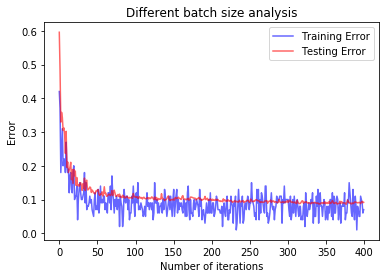

In [10]:
plotTTError(error_dict,'Different batch size analysis')

## 2. Change the learning rate to 0.9, 0.1, and 0.01. Plot the curves of training and test errors for these learning rate.

In [11]:
train_acc_dic = {}
test_acc_dic = {}
lr_lst = [0.9, 0.1, 0.01]

for learning_rate in lr_lst:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    with tfSession() as session:
        error_dict = run_ts(400)
        
    train_acc_dic[learning_rate] = error_dict['Training']
    test_acc_dic[learning_rate] = error_dict['Testing']

In [12]:
x_axis = list(range(0,400))
color = ['red','blue','green']
    
def plotError(errorDict,title):
    plt.title(title)

    for i in range(len(lr_lst)):
        lr = lr_lst[i]
        plt.plot(x_axis, errorDict[lr], color=color[i], alpha=0.6, label='Learning rate%.2f'%lr)
    plt.legend()
    plt.xlabel('Number of iterations')
    plt.ylabel(title)
    plt.show()

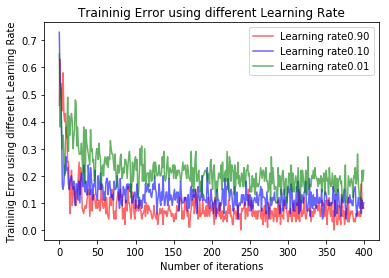

In [13]:
plotError(train_acc_dic, 'Traininig Error using different Learning Rate')

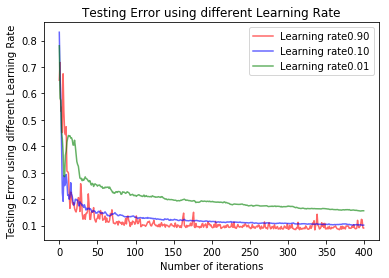

In [14]:
plotError(test_acc_dic, 'Testing Error using different Learning Rate')

## 3. Change the optimizer to Adam and RMSprop and keep the learning rate at 0.5, plot the curves again, compare with part (1).

### (a) Adam Optimizer

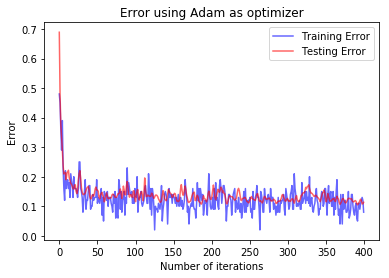

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.5).minimize(cost)
with tfSession() as session:
        error_dict = run_ts(400)
plotTTError(error_dict, 'Error using Adam as optimizer')

### (b) RMSprop Optimizer

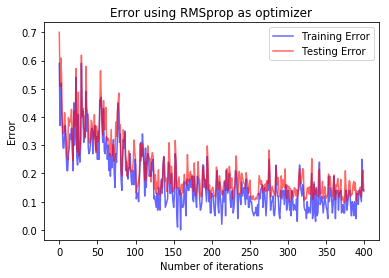

In [16]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.5).minimize(cost)
with tfSession() as session:
        error_dict = run_ts(400)
plotTTError(error_dict, 'Error using RMSprop as optimizer')

### (c) Compare
We can found that Adam convergenced much more faster than SGD and able to reach a lower error rate. However, it is also much more fluctuate than SGD when number of iterations increased.
RMSprop is a very unstable optimizer. It always fluctuates.

## 4. Change the batch size to 1 and 1000, use mini batch SGD and learning rate .5, plot the curves again, compare with part (1).

### (a) Batch size = 1

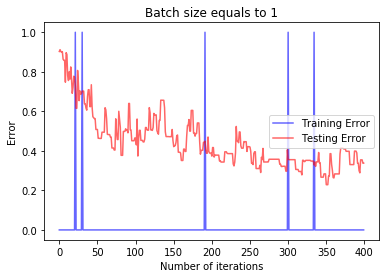

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

with tfSession() as session:
    error_dict = run_ts(400,1)
plotTTError(error_dict, 'Batch size equals to 1')

### (b) Batch size = 1000

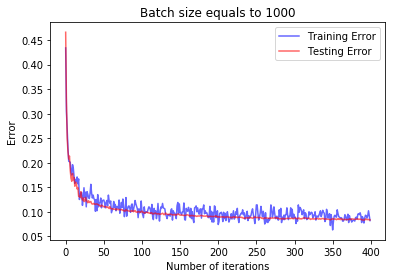

In [18]:
with tfSession() as session:
    error_dict = run_ts(400,1000)
plotTTError(error_dict, 'Batch size equals to 1000')

### (c) Comment
When batch size equals to 1, model is very fluctuate. However testing error still decrease when increase number of iterations, although in very slow rate.
When batch size equals to 1000, model is very stable, convergence very faster and has a higher accuracy.

## 5. Add one hidden layer

In [19]:
n_hidden_layers = 200

weights = {'hidden_layer': tf.Variable(tf.truncated_normal([img_size_flat, n_hidden_layers])),
           'out': tf.Variable(tf.truncated_normal([n_hidden_layers, num_classes]))}
biases = {'hidden_layer': tf.Variable(tf.truncated_normal([n_hidden_layers])),
          'out': tf.Variable(tf.truncated_normal([num_classes]))}

y_layer0 = tf.nn.relu(tf.matmul(x, weights['hidden_layer']) + biases['hidden_layer'])

logits = tf.matmul(y_layer0, weights['out']) + biases['out']

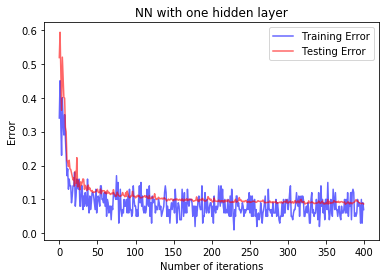

In [20]:
with tfSession() as session:
    error_dict = run_ts(400,100)
plotTTError(error_dict, 'NN with one hidden layer')

### Comment
With one hidden layer, model convergence faster and reach a lower error rate using the same parameters.

## 6. `plot_example_errors()`

In [21]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [22]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

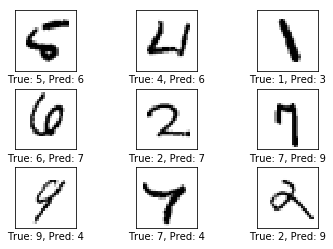

In [23]:
with tfSession() as session:
    error_dict = run_ts(400,100)
    plot_example_errors()

### Comment
We can find that most of images above is the same as images after performing 1000 optimization iterations and some of these images even human cannot distinguish. 